In [52]:
import numpy as np
from numpy import number
from scipy.linalg import solve_banded
import matplotlib.pyplot as plt

In [53]:
q, V, w = 2, 4, 1

alpha, beta = 0, 0
a, b, end_time = -20, 20, 1

N, T = 201, 401

x = np.linspace(a, b, N)
dx = (b-a)/(N-1)

t = np.linspace(0, end_time, T)
dt = end_time/(T-1)

In [54]:
u_exact = w * np.sqrt(2./q) * np.exp(1j * (0.5 * V * np.ones((T, 1)) * x.reshape((1, N)) - 0.25 * (V * V - w * w) * t.reshape((T, 1)) * np.ones((1, N))))
u_exact = u_exact / np.cosh(w * (np.ones((T, 1)) * x.reshape((1, N)) - V * t.reshape((T, 1)) * np.ones((1, N))))

In [55]:
def fd_rhs(u, _dx, _q, _alpha, _beta):
    n = np.size(u)
    f = np.zeros(n, dtype=np.complex_)
    dx2 = _dx ** 2
    # inner nodes
    for i in range(1, n-1):
        f[i] = 1j * ((u[i+1] - 2 * u[i] + u[i-1])/dx2 + _q * np.square(np.abs(u[i])) * u[i])
    # left node i = 0
    i = 0
    f[i] = 1j * (2 * (u[i+1] - u[i] - _dx * _alpha) / dx2 + _q * np.square(np.abs(u[i])) * u[i])

    # right node i = N = n-1
    i = n-1
    f[i] = 1j * (2 * (u[i-1] - u[i] + _dx * _beta) / dx2 + _q * np.square(np.abs(u[i])) * u[i])

    return f

In [56]:
# Euler explicit scheme
def fdm_explicit_solution(u0, _dx, _dt, _q, _alpha, _beta, time_steps):
   
    n = np.size(u0)  # number of nodes = N + 1, where N - number of segments
    u = np.zeros((time_steps, n), dtype=np.complex_)  # solution

    # Initial condition
    u[0, :] = u0

    # solving by direct calculations by time stepping for each space node
    for t in range(time_steps-1):
        u[t+1, :] = u[t, :] + _dt * fd_rhs(u[t, :], _dx, _q, _alpha, _beta)

    return u

u_FDM = fdm_explicit_solution(u_exact[0, :], dx, dt, q, alpha, beta, T)

In [57]:
def L2_error(exact, numerical):
    return np.sqrt(np.sum(np.square(np.abs(exact - numerical))))


def Lmax_error(exact, numerical):
    return np.max(np.abs(exact - numerical))

Errors by complex values
L2_Error_explicit = 0.6700277634907688
L_max_Error_explicit = 0.22531005063275544
-----------------------------------
Errors by absolute values
L2_abs_Error_explicit = 0.07184191013961999
L_max_abs_Error_explicit = 0.025026650506312365
------------------------------------


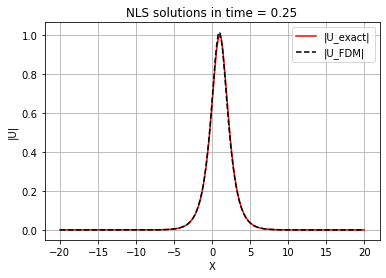

Errors by complex values
L2_Error_explicit = 1.3564924868151185
L_max_Error_explicit = 0.4528591973690483
-----------------------------------
Errors by absolute values
L2_abs_Error_explicit = 0.14904652771537044
L_max_abs_Error_explicit = 0.05065195055698002
------------------------------------


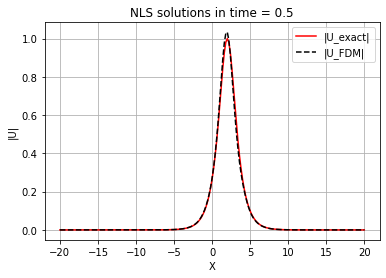

Errors by complex values
L2_Error_explicit = 2.0553714299131034
L_max_Error_explicit = 0.6844118955431273
-----------------------------------
Errors by absolute values
L2_abs_Error_explicit = 0.22958405121748468
L_max_abs_Error_explicit = 0.07660542617095956
------------------------------------


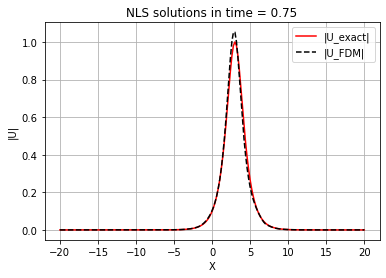

Errors by complex values
L2_Error_explicit = 2.7577058340299936
L_max_Error_explicit = 0.9175669715689151
-----------------------------------
Errors by absolute values
L2_abs_Error_explicit = 0.3119431999707319
L_max_abs_Error_explicit = 0.10261369727339231
------------------------------------


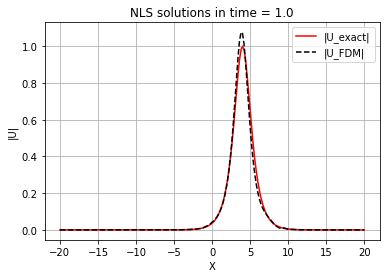

In [60]:
check_times = [1/4, 1/2, 3/4, 1.0]
for time in check_times:
    u_ex = u_exact[int((T-1) * time), :]
    u_sol = u_FDM[int((T-1) * time), :]
    
    print(f'Errors by complex values')
    print(f'L2_Error_explicit = {L2_error(u_ex, u_sol)}')
    print(f'L_max_Error_explicit = {Lmax_error(u_ex, u_sol)}')
  

    print(f'-----------------------------------')
    print(f'Errors by absolute values')
    print(f'L2_abs_Error_explicit = {L2_error(np.abs(u_ex), np.abs(u_sol))}')
    print(f'L_max_abs_Error_explicit = {Lmax_error(np.abs(u_ex), np.abs(u_sol))}')

    print(f'------------------------------------')
    plt.title(f'NLS solutions in time = {end_time * time}')
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('|U|')
    plt.plot(x, np.abs(u_ex), label='|U_exact|', c='r', ls='-')
    plt.plot(x,  np.abs(u_sol), label='|U_FDM|', c='k', ls='--')
    plt.legend()
    plt.show()